In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load excel file:
kpmg_data = 'C:/Users/user/Desktop/Data Science or Data Analytics/KPMG_VI_New_raw_data_update_final.xlsx'

# Read each sheet into separate Dataframe:
transc = pd.read_excel(kpmg_data, sheet_name = 'Transactions')
new_cust = pd.read_excel(kpmg_data, sheet_name = 'NewCustomerList')
cust_dem = pd.read_excel(kpmg_data, sheet_name = 'CustomerDemographic')
cust_addr = pd.read_excel(kpmg_data, sheet_name = 'CustomerAddress')



In [4]:
# Getting a brief summary of the data:

print(transc.info(verbose = False)) 
print(cust_dem.info(verbose = False))
print(cust_addr.info(verbose = False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 13 entries, transaction_id to product_first_sold_date
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 13 entries, customer_id to tenure
dtypes: float64(1), int64(2), object(10)
memory usage: 406.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Columns: 6 entries, customer_id to property_valuation
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
None


In [5]:



#                                 DATA WRANGLING/PRE-PROCESSING




In [6]:




#                                 DATA QUALITY ASSESSMENT





In [7]:
# Getting the list of indices:
print('Transaction data: ', transc.index)
print('Customer Demographic: ', cust_dem.index)
print('Customer Address: ', cust_addr.index)

Transaction data:  RangeIndex(start=0, stop=20000, step=1)
Customer Demographic:  RangeIndex(start=0, stop=4000, step=1)
Customer Address:  RangeIndex(start=0, stop=3999, step=1)


In [8]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [9]:
cust_addr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [10]:
transc.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [11]:
print("Number of unique customer IDs in Transaction data are: ", transc['customer_id'].nunique())
print("Number of unique customer IDs in Customer Demographic data are: ", cust_dem['customer_id'].nunique())
print("number of unique customer IDs in Customer Address are: ", cust_addr['customer_id'].nunique())

Number of unique customer IDs in Transaction data are:  3494
Number of unique customer IDs in Customer Demographic data are:  4000
number of unique customer IDs in Customer Address are:  3999


In [12]:

#           CHECKING FOR MISSING VALUES OR EMPTY ROWS

# Printing out the sum of all the missing values in the 3 datasets given:
print("Missing values in Transaction table:\n", transc.isnull().sum(), "\n")
print("Missing values in Customer Demographic:\n", cust_dem.isnull().sum(), "\n")
print("Missing values in Customer Address table:\n", cust_addr.isnull().sum(), "\n")

Missing values in Transaction table:
 transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64 

Missing values in Customer Demographic:
 customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                      

In [13]:
# Perfoming a spellcheck:
# Use either 'pyspellchecker' or 'TextBlob' libraries
'''
from spellchecker import SpellChecker

spell = SpellChecker()   # Initialize the spell checker

names = cust_dem['first_name'].tolist()

misspelled = spell.unknown(names)


for word in misspelled:
    # Get the one 'most likely' answer
    correct_word = spell.correction(word)
    print(f"{word} -> {correct_word}")
    
    # Get a list of 'likely' options
    suggestions = spell.candidates(word)
    print(f"Suggestions for {word}: {suggestions}")
'''

'\nfrom spellchecker import SpellChecker\n\nspell = SpellChecker()   # Initialize the spell checker\n\nnames = cust_dem[\'first_name\'].tolist()\n\nmisspelled = spell.unknown(names)\n\n\nfor word in misspelled:\n    # Get the one \'most likely\' answer\n    correct_word = spell.correction(word)\n    print(f"{word} -> {correct_word}")\n    \n    # Get a list of \'likely\' options\n    suggestions = spell.candidates(word)\n    print(f"Suggestions for {word}: {suggestions}")\n'

In [14]:
# checking the datatypes
print("Custmer demographic datatypes: \n", cust_dem.dtypes, "\n")
print("Customer address datatypes: \n", cust_addr.dtypes, "\n")
print("Transaction datatypes: \n", transc.dtypes)

Custmer demographic datatypes: 
 customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
default                                 object
owns_car                                object
tenure                                 float64
dtype: object 

Customer address datatypes: 
 customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object 

Transaction datatypes: 
 transaction_id                      int64
product_id                          int64
customer_id

In [15]:

#      CUSTOMER DEMOGRAPHIC TABLE:


In [16]:


#                        DEALING WITH THE MISSING VALUES:



In [17]:
# Checking for the most frequent job title :
common_job_title = cust_dem['job_title'].value_counts().idxmax()
common_job_title 

'Business Systems Development Analyst'

In [18]:
# Most frequent Last name that occured in the dataset:

freq_ln = cust_dem['last_name'].value_counts().idxmax()
freq_ln

'Pristnor'

In [19]:
# Most frequent job industry category:
freq_ind_cat = cust_dem['job_industry_category'].value_counts().idxmax()
freq_ind_cat

'Manufacturing'

In [20]:
# The average tenure :
mean_tenure = cust_dem['tenure'].mean()
mean_tenure

10.65704063378482

In [21]:

# Replacing the missing values:

cust_dem['last_name'].replace(np.nan, freq_ln, inplace = True)
cust_dem['job_title'].replace(np.nan, common_job_title, inplace = True)
cust_dem['job_industry_category'].replace(np.nan, freq_ind_cat, inplace = True)



C:\Users\user\AppData\Local\Temp\ipykernel_11720\2888433590.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_dem['last_name'].replace(np.nan, freq_ln, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_11720\2888433590.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [22]:
# Dropping the 'default' column
cust_dem.drop(columns = ['default'], inplace = True)


In [23]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Pristnor,Male,33,1961-10-03 00:00:00,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0


In [24]:
# Dropping the rows with missing value in the 'DOB' column:
cust_dem.dropna(axis = 0, inplace = True)

In [25]:
cust_dem['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [26]:
cust_dem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3913 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   first_name                           3913 non-null   object 
 2   last_name                            3913 non-null   object 
 3   gender                               3913 non-null   object 
 4   past_3_years_bike_related_purchases  3913 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3913 non-null   object 
 7   job_industry_category                3913 non-null   object 
 8   wealth_segment                       3913 non-null   object 
 9   deceased_indicator                   3913 non-null   object 
 10  owns_car                             3913 non-null   object 
 11  tenure                             

In [27]:

#              CHECKING FOR DUPLICATES


In [28]:
# Checking for duplicates in customer id

cust_dem['customer_id'].duplicated().any()

False

In [29]:
cust_dem['first_name'].duplicated().any()

True

In [30]:

#               CHECKING DATA FORMATS


In [31]:
cust_dem.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                 float64
dtype: object

In [32]:

# Changing datatype for tenure to integer
cust_dem['tenure'] = cust_dem['tenure'].astype('int64')


In [33]:
cust_dem['DOB'] = cust_dem['DOB'].astype('datetime64[ns]')

In [34]:

#            CONSISTENCY


In [35]:
# Checking to see the unique values in the gender column
cust_dem['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [36]:
# To enable consistency, the code below will stick 
cust_dem['gender'].replace('M', 'Male', inplace = True)
cust_dem['gender'].replace('F', 'Female', inplace = True)
cust_dem['gender'].replace('Femal', 'Female', inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_11720\2902429487.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_dem['gender'].replace('M', 'Male', inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_11720\2902429487.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [37]:
cust_dem['gender'].unique()

array(['Female', 'Male', 'U'], dtype=object)

In [38]:


#         CUSTOMER ADDRESS



In [39]:

#                                MISSING DATA


In [40]:
cust_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [41]:
cust_addr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [42]:
cust_addr['country'].unique()

array(['Australia'], dtype=object)

In [43]:
cust_addr['address'].duplicated().all()

False

In [44]:

#            DUPLICATES
cust_addr['address'].duplicated().any()

True

In [45]:


#                         TRANSACTIONS DATA



In [46]:

#            DEALING WITH MISSING DATA


In [47]:
transc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [48]:
'''
13 Unnamed columns with no values
online order has empty rows
brand
product_line
product_class
product_size
list_price
standard_cost
product_first_sold_date
'''

'\n13 Unnamed columns with no values\nonline order has empty rows\nbrand\nproduct_line\nproduct_class\nproduct_size\nlist_price\nstandard_cost\nproduct_first_sold_date\n'

In [49]:
transc.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [50]:
# Let get the average online order :
avg_online_order = transc['online_order'].mean()
print(avg_online_order)                 # average value of online order
print(transc['online_order'].idxmax())  # most occuring value

0.5004582484725051
1


In [51]:
# Replacing the missing values in online order with the most occuring value
transc['online_order'].replace(np.nan, 1, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_11720\4120040327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transc['online_order'].replace(np.nan, 1, inplace = True)


In [52]:
# Drop all the remaining empty columns in the dataset
#transc.drop(columns = ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
 #                      'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace = True)

In [53]:
transc.dropna(axis = 0, inplace = True)

In [54]:
transc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 non-nu

In [55]:

#                  DATA FORMATS


In [56]:
# Changing the data type of online_order from float to int
transc['online_order'] = transc['online_order'].astype('int64')

In [57]:
# Converting Float to Datetime for "Product first sold date"
transc['product_first_sold_date'] = pd.to_datetime(transc['product_first_sold_date'], origin = '1899-12-30', unit = 'D')


In [58]:
transc.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [59]:
#transc.set_index('customer_id', inplace = True)

In [60]:
transc['online_order'].unique()

array([0, 1], dtype=int64)

In [61]:
'''
# Checking for whitespaces:
def check_whitespaces(cust_dem):
    for column in cust_dem.columns:
        if cust_dem[column].dtype == 'object': # checks only string columns
            whitespaces = cust_dem[column].apply(lambda x: x != x.strip() if isinstance(x, str) else False)
            if whitespaces.any():
                print(f"Column '{column}' has whitespaces in the following rows:")
                print(cust_dem[whitespaces])

# Run the function:
check_whitespaces(cust_dem)
'''

'\n# Checking for whitespaces:\ndef check_whitespaces(cust_dem):\n    for column in cust_dem.columns:\n        if cust_dem[column].dtype == \'object\': # checks only string columns\n            whitespaces = cust_dem[column].apply(lambda x: x != x.strip() if isinstance(x, str) else False)\n            if whitespaces.any():\n                print(f"Column \'{column}\' has whitespaces in the following rows:")\n                print(cust_dem[whitespaces])\n\n# Run the function:\ncheck_whitespaces(cust_dem)\n'

In [62]:
# Trim whitespaces from all string columns
# df_trimmed = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [63]:
'''
columns_with_duplicates = {}

# Loop through each column to check for duplicates
for column in cust_dem.columns:
    if cust_dem[column].duplicated().any():
        # Store duplicate values
        columns_with_duplicates[column] = cust_dem[column][cust_dem[column].duplicated()]

# Print columns with duplicate values
for column, values in columns_with_duplicates.items():
    print(f"Column '{column}' has duplicate values:\n{values}\n")
'''

'\ncolumns_with_duplicates = {}\n\n# Loop through each column to check for duplicates\nfor column in cust_dem.columns:\n    if cust_dem[column].duplicated().any():\n        # Store duplicate values\n        columns_with_duplicates[column] = cust_dem[column][cust_dem[column].duplicated()]\n\n# Print columns with duplicate values\nfor column, values in columns_with_duplicates.items():\n    print(f"Column \'{column}\' has duplicate values:\n{values}\n")\n'

In [64]:

                    
#                        MERGING THE DATASETS
    


In [65]:
# Merging the cust_dem and cust_addr first using the customer_id variable as the key id connecting them
merged_df1 =  pd.merge(cust_dem, cust_addr, on = 'customer_id', how = 'left')

In [66]:
merged_df1

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,Pristnor,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14,613 Erie Lane,2088.0,NSW,Australia,12.0
3909,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19,0 Transport Center,3977.0,VIC,Australia,6.0
3910,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1,4 Dovetail Crossing,2350.0,NSW,Australia,2.0
3911,3999,Patrizius,Pristnor,Male,11,1973-10-24,Business Systems Development Analyst,Manufacturing,Affluent Customer,N,Yes,10,1482 Hauk Trail,3064.0,VIC,Australia,3.0


In [67]:
# Merging the merged_df1 with the transc data:
merged_df = pd.merge(merged_df1, transc, on = 'customer_id', how = 'left')

In [68]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19858 entries, 0 to 19857
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19858 non-null  int64         
 1   first_name                           19858 non-null  object        
 2   last_name                            19858 non-null  object        
 3   gender                               19858 non-null  object        
 4   past_3_years_bike_related_purchases  19858 non-null  int64         
 5   DOB                                  19858 non-null  datetime64[ns]
 6   job_title                            19858 non-null  object        
 7   job_industry_category                19858 non-null  object        
 8   wealth_segment                       19858 non-null  object        
 9   deceased_indicator                   19858 non-null  object        
 10  owns_car  

In [69]:
merged_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                 27
postcode                                27
state                                   27
country                                 27
property_valuation                      27
transaction_id                         496
product_id                             496
transaction_date                       496
online_order                           496
order_status                           496
brand                                  496
product_lin

In [70]:
merged_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19853,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
19854,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
19855,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
19856,3999,Patrizius,Pristnor,Male,11,1973-10-24,Business Systems Development Analyst,Manufacturing,Affluent Customer,N,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [71]:
merged_df['DOB'].max()

Timestamp('2002-03-11 00:00:00')

In [72]:
merged_df.dropna(axis=0, inplace = True)

In [73]:
merged_df.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class   

In [74]:
merged_df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                      float64
state                                          object
country                                        object
property_valuation                            float64
transaction_id                                float64
product_id                  

In [75]:
merged_df['gender'].value_counts()

gender
Female    9908
Male      9419
U            8
Name: count, dtype: int64

In [76]:

merged_df['gender'].replace('U', 'Female', inplace = True )

C:\Users\user\AppData\Local\Temp\ipykernel_11720\4116098567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['gender'].replace('U', 'Female', inplace = True )


In [77]:

# Converting the datatype for postcode from float to int64
merged_df['postcode'] = merged_df['postcode'].astype('int64')

In [78]:
# Converting datatype for property_valuation to int64
merged_df['property_valuation'] = merged_df['property_valuation'].astype('int64')

In [79]:
# Converting datatype for transaction_id and product_id to int64
merged_df['transaction_id'] = merged_df['transaction_id'].astype('int64')
merged_df['product_id'] = merged_df['product_id'].astype('int64')

In [80]:
merged_df['online_order'] = merged_df['online_order'].astype('int64')

In [81]:
merged_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19364,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,N,...,2017-01-09,1,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,1992-10-02
19365,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,N,...,2017-02-16,0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,2000-05-22
19366,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,N,...,2017-08-08,0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1992-10-11
19367,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,N,...,2017-01-11,0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1993-07-15


In [82]:
merged_df['postcode'] = merged_df['postcode'].astype(str)

In [83]:
# merged_df.to_excel('KPMG_cleaned_data.xlsx', index=False, encoding = 'utf-8', engine='openpyxl')

In [84]:

#          NEW CUSTOMER LIST


In [85]:
new_cust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.64,0.8000,1.00000,0.850000,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.93750,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.97,0.9700,0.97000,0.970000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.02,1.2750,1.27500,1.275000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.68,0.6800,0.85000,0.850000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.41,0.4100,0.41000,0.410000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.44,0.4400,0.55000,0.467500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.93,1.1625,1.16250,1.162500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.57,0.7125,0.71250,0.605625,997,997,0.357000


In [86]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [87]:
new_cust['job_industry_category'].value_counts()

job_industry_category
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

In [88]:
# Dropping the nameless columns 
new_cust.drop(columns = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], inplace = True)

In [89]:
common_jt = new_cust['job_title'].value_counts().idxmax()  # assigning the most common job title to a variable
print(common_jt)   # printing out the most common job title
new_cust['job_title'].replace(np.nan, common_jt, inplace = True)  # This replaces the missing values with the most common job_title

Associate Professor


C:\Users\user\AppData\Local\Temp\ipykernel_11720\1736162083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_cust['job_title'].replace(np.nan, common_jt, inplace = True)  # This replaces the missing values with the most common job_title


In [90]:
common_jic = new_cust['job_industry_category'].value_counts().idxmax()  # assigning the most common job title to a variable
print(common_jic)   # printing out the most common job title
new_cust['job_industry_category'].replace(np.nan, common_jic, inplace = True)  # This replaces the missing values with the most common job_title

Financial Services


C:\Users\user\AppData\Local\Temp\ipykernel_11720\635507727.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_cust['job_industry_category'].replace(np.nan, common_jic, inplace = True)  # This replaces the missing values with the most common job_title


#                           DATA ANALYSIS AND EXPLORATION

In [92]:
merged_df.shape

(19335, 29)

In [93]:
merged_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09


In [94]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19335 entries, 0 to 19368
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19335 non-null  int64         
 1   first_name                           19335 non-null  object        
 2   last_name                            19335 non-null  object        
 3   gender                               19335 non-null  object        
 4   past_3_years_bike_related_purchases  19335 non-null  int64         
 5   DOB                                  19335 non-null  datetime64[ns]
 6   job_title                            19335 non-null  object        
 7   job_industry_category                19335 non-null  object        
 8   wealth_segment                       19335 non-null  object        
 9   deceased_indicator                   19335 non-null  object        
 10  owns_car       

In [95]:
merged_df.describe()

,customer_id,past_3_years_bike_related_purchases,DOB,tenure,property_valuation,transaction_id,product_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,19335.000000,19335.000000,19335,19335.000000,19335.000000,19335.000000,19335.000000,19335,19335.000000,19335.000000,19335.000000,19335
mean,1740.081303,48.941298,1977-08-02 18:04:18.060512,10.684355,7.516214,9988.570934,45.790070,2017-07-01 14:25:29.371605760,0.509646,1106.615601,555.896088,2004-08-03 23:35:52.179984512
min,1.000000,0.000000,1843-12-21 00:00:00,1.000000,1.000000,1.000000,0.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,1991-01-21 00:00:00
25%,859.000000,24.000000,1968-04-20 00:00:00,6.000000,6.000000,4993.500000,18.000000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,1997-08-25 00:00:00
50%,1737.000000,48.000000,1977-08-30 00:00:00,11.000000,8.000000,9983.000000,45.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,2004-08-17 00:00:00
75%,2615.000000,73.000000,1987-03-27 00:00:00,15.000000,10.000000,14986.500000,72.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,2011-05-09 00:00:00
max,3500.000000,99.000000,2002-03-11 00:00:00,22.000000,12.000000,20000.000000,100.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,2016-12-06 00:00:00
std,1010.130658,28.639388,NaN,5.674731,2.826311,5773.791341,30.561015,NaN,0.499920,582.886996,405.814845,NaN


####  Creating an Age feature from DOB

In [97]:

# using the datetime module

from datetime import datetime

# calculating the age at transaction
merged_df['age_at_transaction'] = merged_df['transaction_date'].dt.year - merged_df['DOB'].dt.year



In [98]:
# merged_df['age_at_transaction'] -= ((merged_df['transaction_date'].dt.month, merged_df['transaction_date'].dt.day) < 
 #                            (merged_df['DOB'].dt.month, merged_df['DOB'].dt.day))

In [99]:
merged_df[['age_at_transaction' ,'deceased_indicator']].min()

age_at_transaction    15
deceased_indicator     N
dtype: object

In [100]:
merged_df['age_at_transaction'].max()

174

#### Creating an age_group feature from age_at_transaction 

In [102]:
# Creating an age_group feature:

# Binning:
bins = np.linspace(min(merged_df['age_at_transaction']), max(merged_df['age_at_transaction']), 16)

group_names = ['Adolescents and Young Adults', 'Early Career Adults', 'Mid-Career Adults', 'Mature Adults', 'Pre-Retirement',
               'Early Retirees', 'Late Retirees', 'Seniors', 'Elderly', 'Centenarians', 'Super-Centenarians', 'Older Super-Centenarians',
               'Very Old Age Group', 'Exceptional Longevity Group', 'Maximum Longevity']

merged_df['age_group'] = pd.cut(merged_df['age_at_transaction'], bins, labels = group_names, include_lowest = True)


In [103]:
merged_df['age_at_transaction'] = merged_df['age_at_transaction'].astype('int64')

In [104]:
merged_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age_at_transaction,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,64,Pre-Retirement
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,64,Pre-Retirement
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,64,Pre-Retirement
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,64,Pre-Retirement
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,64,Pre-Retirement


#### Importing matplotlib library

In [106]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.8.4


In [107]:
merged_df.describe()

,customer_id,past_3_years_bike_related_purchases,DOB,tenure,property_valuation,transaction_id,product_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date,age_at_transaction
count,19335.000000,19335.000000,19335,19335.000000,19335.000000,19335.000000,19335.000000,19335,19335.000000,19335.000000,19335.000000,19335,19335.000000
mean,1740.081303,48.941298,1977-08-02 18:04:18.060512,10.684355,7.516214,9988.570934,45.790070,2017-07-01 14:25:29.371605760,0.509646,1106.615601,555.896088,2004-08-03 23:35:52.179984512,39.914714
min,1.000000,0.000000,1843-12-21 00:00:00,1.000000,1.000000,1.000000,0.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,1991-01-21 00:00:00,15.000000
25%,859.000000,24.000000,1968-04-20 00:00:00,6.000000,6.000000,4993.500000,18.000000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,1997-08-25 00:00:00,30.000000
50%,1737.000000,48.000000,1977-08-30 00:00:00,11.000000,8.000000,9983.000000,45.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,2004-08-17 00:00:00,40.000000
75%,2615.000000,73.000000,1987-03-27 00:00:00,15.000000,10.000000,14986.500000,72.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,2011-05-09 00:00:00,49.000000
max,3500.000000,99.000000,2002-03-11 00:00:00,22.000000,12.000000,20000.000000,100.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,2016-12-06 00:00:00,174.000000
std,1010.130658,28.639388,NaN,5.674731,2.826311,5773.791341,30.561015,NaN,0.499920,582.886996,405.814845,NaN,12.889325


## Explore Individual Features

Categorical Variables:

In [109]:
print( merged_df['gender'].value_counts(), '\n')
print(merged_df['state'].value_counts(), '\n')
print(merged_df['country'].value_counts(), '\n')
print(merged_df['job_title'].value_counts(), '\n')
print(merged_df['job_industry_category'].value_counts(), '\n')
print(merged_df['wealth_segment'].value_counts(), '\n')
print(merged_df['deceased_indicator'].value_counts(), '\n')
print(merged_df['brand'].value_counts(), '\n')
print(merged_df['product_line'].value_counts(), '\n')
print(merged_df['product_class'].value_counts(), '\n')
print(merged_df['product_size'].value_counts(), '\n')
print(merged_df['order_status'].value_counts(), '\n')
print(merged_df['owns_car'].value_counts(), '\n')
print(merged_df['postcode'].value_counts(), )

gender
Female    9916
Male      9419
Name: count, dtype: int64 

state
NSW                9855
VIC                4402
QLD                4143
New South Wales     472
Victoria            463
Name: count, dtype: int64 

country
Australia    19335
Name: count, dtype: int64 

job_title
Business Systems Development Analyst    2519
Social Worker                            219
Legal Assistant                          212
Nuclear Power Engineer                   202
Internal Auditor                         201
                                        ... 
Automation Specialist IV                  15
Health Coach III                          14
Geologist II                              11
Research Assistant III                     9
Developer I                                7
Name: count, Length: 195, dtype: int64 

job_industry_category
Manufacturing         7154
Financial Services    3798
Health                3048
Retail                1746
Property              1278
IT                     

###### 

###
Numerical Variables:

1. list_price
2. standard_cost
3. tenure     ->    *length of time a customer has been associated with the company* 
4. property_valuation
5. age_at_transaction
6. postcode
7. past_3_years_bike_related_purchases

In [112]:
merged_df.shape

(19335, 31)

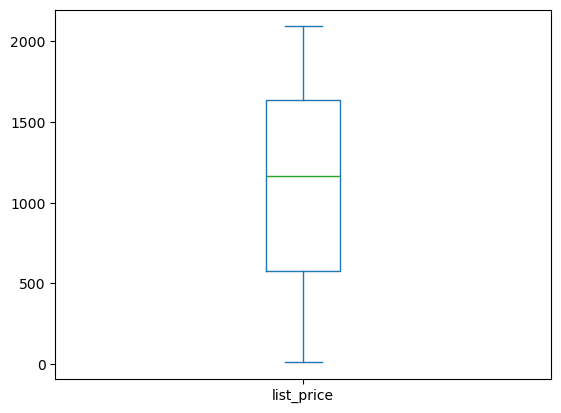

In [113]:
merged_df['list_price'].plot(kind = 'box')
plt.show()

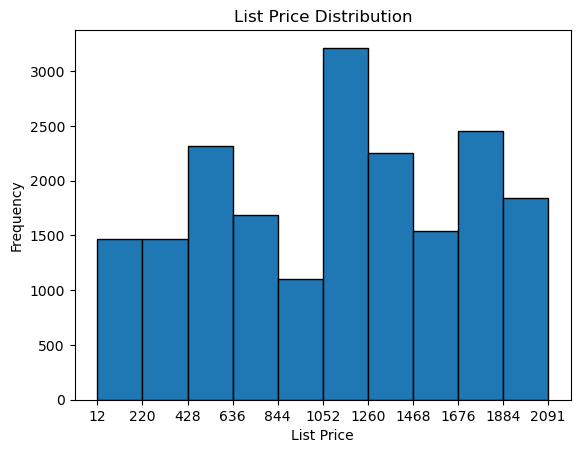

In [114]:
# Frequency Distribution of 'list_price'
count, bin_edges = np.histogram(merged_df['list_price'])
merged_df['list_price'].plot(kind= 'hist', xticks = bin_edges,
                            edgecolor = 'black')

plt.xlabel('List Price')
plt.title('List Price Distribution')

plt.show()

<Axes: >

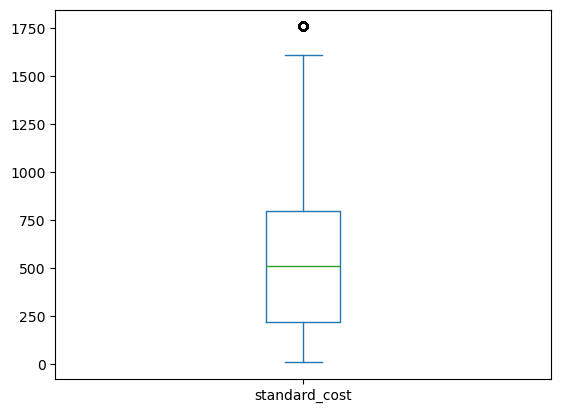

In [115]:
merged_df['standard_cost'].plot(kind = 'box')

###### 
To identify the specific rows that contain the outlier:

In [117]:
outliers = merged_df[merged_df['standard_cost'] > 1.5 * (merged_df['standard_cost'].quantile(0.75) - merged_df['standard_cost'].quantile(0.25)) + merged_df['standard_cost'].quantile(0.75)]
outliers.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age_at_transaction,age_group
199,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24,174,Maximum Longevity
219,38,Cordi,Merman,Female,37,1955-10-29,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24,62,Pre-Retirement
330,54,Loralyn,Wonfor,Female,2,1966-07-24,Sales Associate,Property,Mass Customer,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2015-06-17,51,Mature Adults
770,134,Merna,McCulloch,Female,34,1997-08-01,Legal Assistant,Telecommunications,Affluent Customer,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2015-06-17,20,Adolescents and Young Adults
783,136,Mel,Bennet,Male,46,1973-05-26,Senior Developer,Manufacturing,High Net Worth,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,1993-06-23,44,Mid-Career Adults
814,140,Morrie,Flaxon,Male,9,1994-05-20,Programmer Analyst III,Manufacturing,Mass Customer,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24,23,Adolescents and Young Adults
826,142,Bentley,Fortesquieu,Male,57,1967-08-07,Quality Engineer,Health,Affluent Customer,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24,50,Mature Adults
964,172,Hilton,Carney,Male,54,1988-09-12,Editor,Manufacturing,Affluent Customer,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24,29,Early Career Adults
1237,217,Jeralee,Quartly,Female,63,1979-12-09,Business Systems Development Analyst,Manufacturing,High Net Worth,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24,38,Mid-Career Adults
1328,234,Mead,Alpes,Female,71,1969-08-12,Chief Design Engineer,Retail,High Net Worth,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24,48,Mature Adults


###### 
The observation suggests that the outlier in 'standard_cost' could be related to the specific brand : Giant Bicycles, product line: Standard, with a high product class.


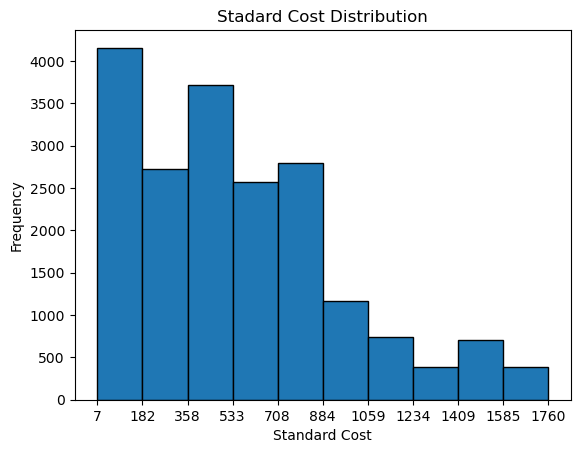

In [119]:
# Frequency distribution of 'standard_cost'[
count, bin_edges = np.histogram(merged_df['standard_cost'])
merged_df['standard_cost'].plot(kind= 'hist', xticks = bin_edges, edgecolor = 'black')

plt.xlabel('Standard Cost')
plt.title('Stadard Cost Distribution')

plt.show()

<Axes: >

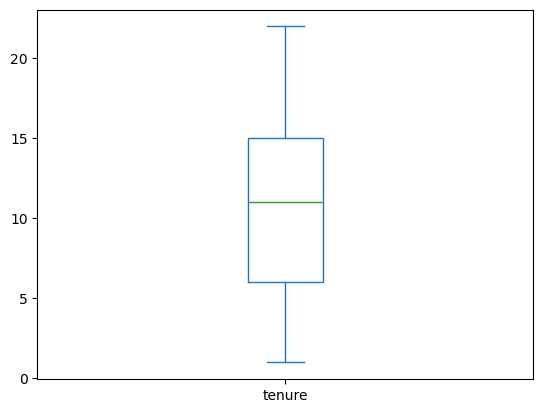

In [120]:
merged_df['tenure'].plot(kind = 'box')

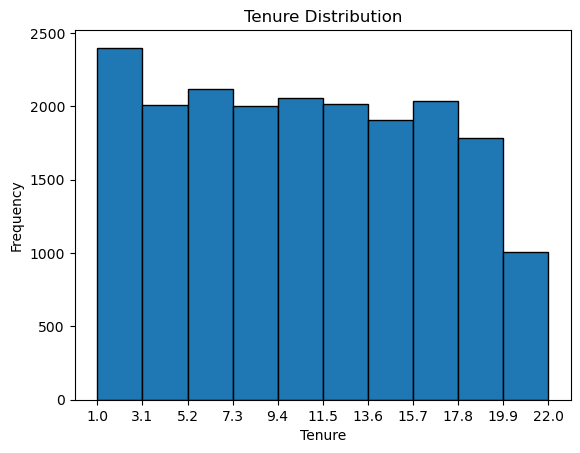

In [121]:
# Frequency distribution of 'tenure' 
count, bin_edges = np.histogram(merged_df['tenure'])
merged_df['tenure'].plot(kind= 'hist', xticks = bin_edges, edgecolor = 'black')
#plt.style.use('ggplot')
plt.xlabel('Tenure')
plt.title('Tenure Distribution')

plt.show()

<Axes: >

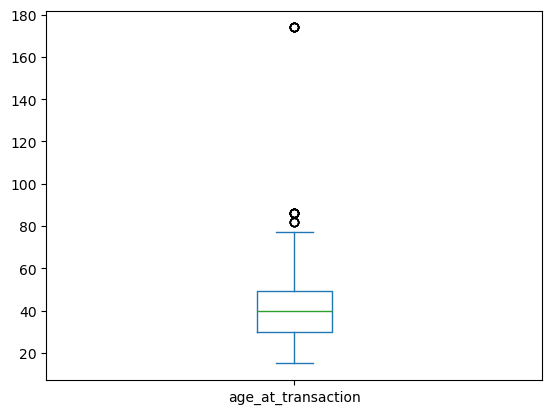

In [122]:
merged_df['age_at_transaction'].plot(kind = 'box')


In [123]:
outliers1 = merged_df[merged_df['age_at_transaction'] > 1.5 * (merged_df['age_at_transaction'].quantile(0.75) - merged_df['age_at_transaction'].quantile(0.25)) + merged_df['age_at_transaction'].quantile(0.75)]


In [124]:
outliers1

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age_at_transaction,age_group
195,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,Approved,Solex,Road,medium,small,1703.52,1516.13,2011-04-16,174,Maximum Longevity
196,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,2005-12-07,174,Maximum Longevity
197,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,Approved,Solex,Touring,medium,large,2083.94,675.03,2013-09-16,174,Maximum Longevity
198,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,2004-08-17,174,Maximum Longevity
199,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24,174,Maximum Longevity
200,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,Approved,Solex,Standard,medium,medium,1163.89,589.27,2016-07-09,174,Maximum Longevity
201,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,Approved,WeareA2B,Road,low,small,1172.78,1043.77,2002-10-10,174,Maximum Longevity
202,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,2015-05-21,174,Maximum Longevity
4073,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2014-07-28,86,Late Retirees
4074,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,Approved,Solex,Road,medium,large,1777.80,820.78,2012-05-18,86,Late Retirees


Investigating the outliers:

In [125]:
outliers1[['first_name', 'gender', 'age_at_transaction', 'deceased_indicator', 'DOB', 'transaction_date','brand', 'job_title',
          'address', 'online_order', 'wealth_segment']]

,first_name,gender,age_at_transaction,deceased_indicator,DOB,transaction_date,brand,job_title,address,online_order,wealth_segment
195,Jephthah,Female,174,N,1843-12-21,2017-07-01,Solex,Legal Assistant,833 Luster Way,1,Affluent Customer
196,Jephthah,Female,174,N,1843-12-21,2017-08-22,Norco Bicycles,Legal Assistant,833 Luster Way,0,Affluent Customer
197,Jephthah,Female,174,N,1843-12-21,2017-04-07,Solex,Legal Assistant,833 Luster Way,0,Affluent Customer
198,Jephthah,Female,174,N,1843-12-21,2017-02-13,WeareA2B,Legal Assistant,833 Luster Way,0,Affluent Customer
199,Jephthah,Female,174,N,1843-12-21,2017-06-25,Giant Bicycles,Legal Assistant,833 Luster Way,1,Affluent Customer
200,Jephthah,Female,174,N,1843-12-21,2017-07-23,Solex,Legal Assistant,833 Luster Way,0,Affluent Customer
201,Jephthah,Female,174,N,1843-12-21,2017-04-10,WeareA2B,Legal Assistant,833 Luster Way,1,Affluent Customer
202,Jephthah,Female,174,N,1843-12-21,2017-09-19,WeareA2B,Legal Assistant,833 Luster Way,0,Affluent Customer
4073,Darrel,Male,86,N,1931-10-23,2017-09-09,Giant Bicycles,Recruiting Manager,78 Glacier Hill Drive,0,Affluent Customer
4074,Darrel,Male,86,N,1931-10-23,2017-09-27,Solex,Recruiting Manager,78 Glacier Hill Drive,0,Affluent Customer


###### 


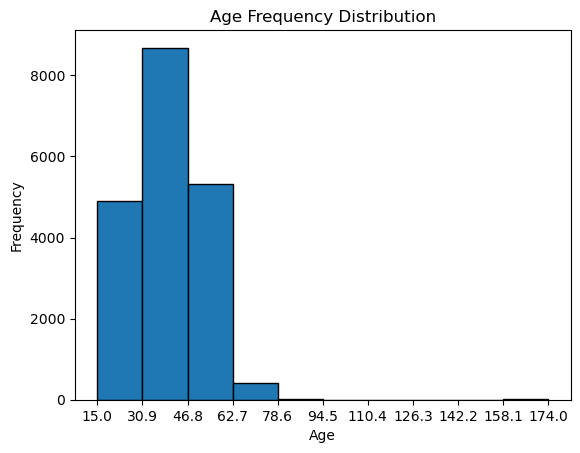

In [127]:
count, bin_edges = np.histogram(merged_df['age_at_transaction'])
merged_df['age_at_transaction'].plot(kind= 'hist', xticks = bin_edges,
                                    edgecolor = 'black')

plt.xlabel('Age')
plt.title('Age Frequency Distribution')

plt.show()

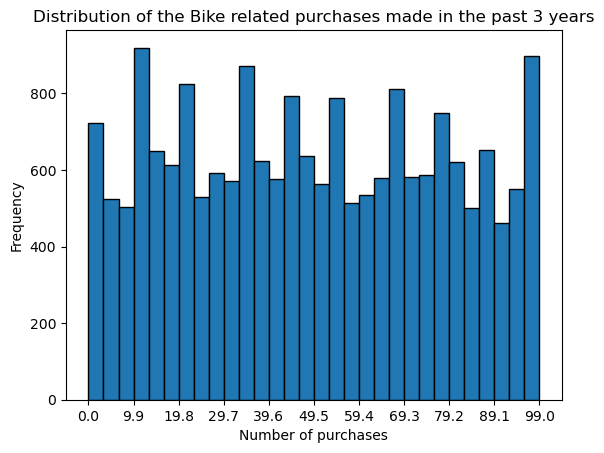

In [128]:
count, bin_edges = np.histogram(merged_df['past_3_years_bike_related_purchases'])
merged_df['past_3_years_bike_related_purchases'].plot(kind = 'hist', xticks = bin_edges, bins = 30,
                                                      edgecolor = 'black')

plt.xlabel('Number of purchases')
plt.title('Distribution of the Bike related purchases made in the past 3 years')
plt.show()


In [129]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19335 entries, 0 to 19368
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19335 non-null  int64         
 1   first_name                           19335 non-null  object        
 2   last_name                            19335 non-null  object        
 3   gender                               19335 non-null  object        
 4   past_3_years_bike_related_purchases  19335 non-null  int64         
 5   DOB                                  19335 non-null  datetime64[ns]
 6   job_title                            19335 non-null  object        
 7   job_industry_category                19335 non-null  object        
 8   wealth_segment                       19335 non-null  object        
 9   deceased_indicator                   19335 non-null  object        
 10  owns_car       